# Capstone Project-Data analysis and visulisation

## Overview
#### If you are planning on going out to see a movie, how well can you trust online reviews and ratings? Especially if the same company showing the rating also makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

#### The purpose of this project is to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.

#### Data is collected from https://fivethirtyeight.com/features/fandango-movies-ratings/

#### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read dataset

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

#### Explore the DataFrame Properties and Head

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


#### Explore the relationship between rating and votes

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

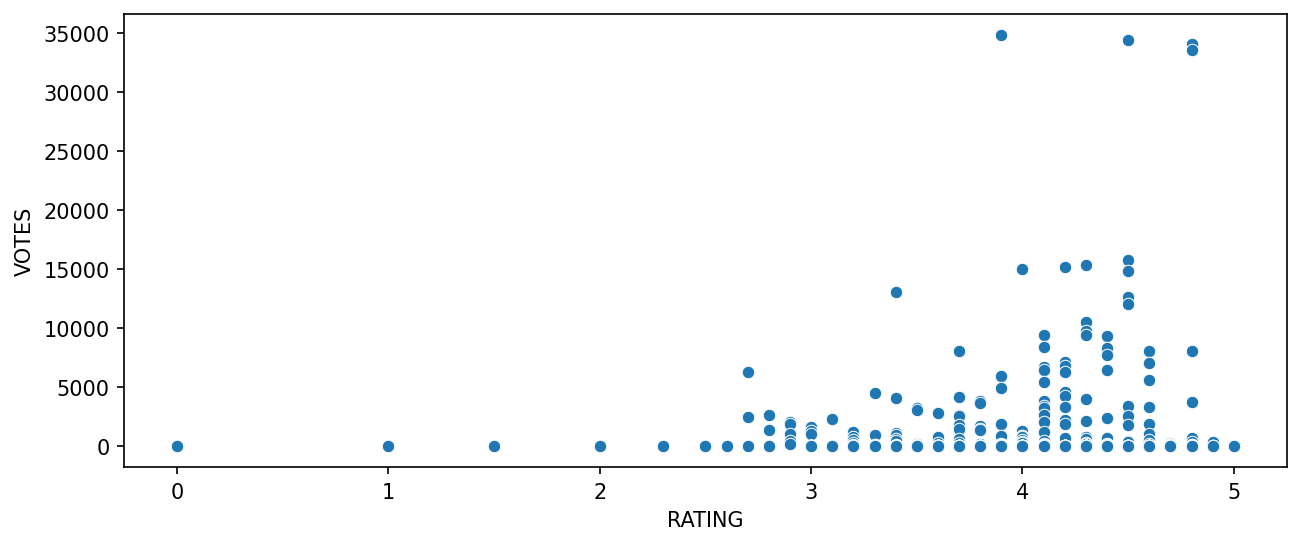

In [6]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=fandango, x= 'RATING', y='VOTES')

#### Explore the correlation between the columns

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


#### Film Title Name (Year) , this column can be created to new column as Year

In [8]:
title = 'Film Title Name (Year)'

In [9]:
title.split('(')[-1].replace(')','')

'Year'

In [10]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [11]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


#### Q: How many movies are in the Fandango per year?

In [12]:
fandango['YEAR'].value_counts()

2015    478
2014     23
1964      1
2012      1
2016      1
Name: YEAR, dtype: int64

#### Visualise a plot based on the count of movies per year 

<AxesSubplot:xlabel='YEAR', ylabel='count'>

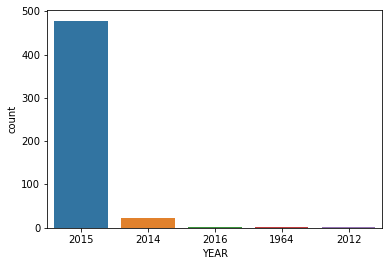

In [13]:
sns.countplot(data=fandango, x='YEAR')

#### Q: What are the 10 movies with the highest humber of votes?

In [14]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


#### Q: How many movies have zero votes?

In [15]:
fandango[fandango['VOTES'] == 0]

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [16]:
len(fandango[fandango['VOTES'] == 0])

69

#### Remove the films that have zero votes

In [17]:
fan_reviewed = fandango[fandango['VOTES']>0]

#### Create a KDE plot which displays the distribution of ratings (True & STARS)

<AxesSubplot:xlabel='RATING', ylabel='Density'>

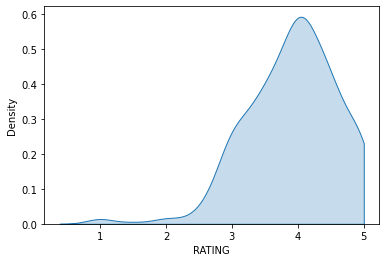

In [18]:
sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')

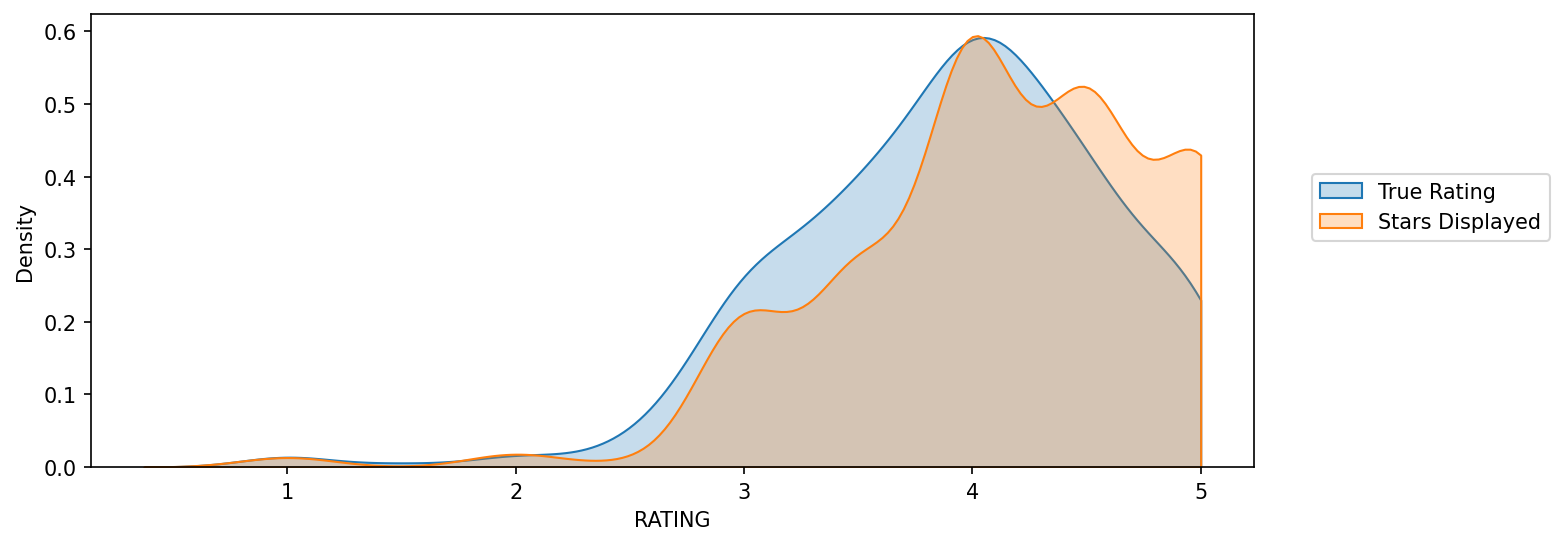

In [19]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

#### Quantify the discrepancy

In [20]:

fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

<ipython-input-20-bbd551dadc81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
<ipython-input-20-bbd551dadc81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


In [21]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


#### Create a count plot to show the number of times that a certain difference occurs

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

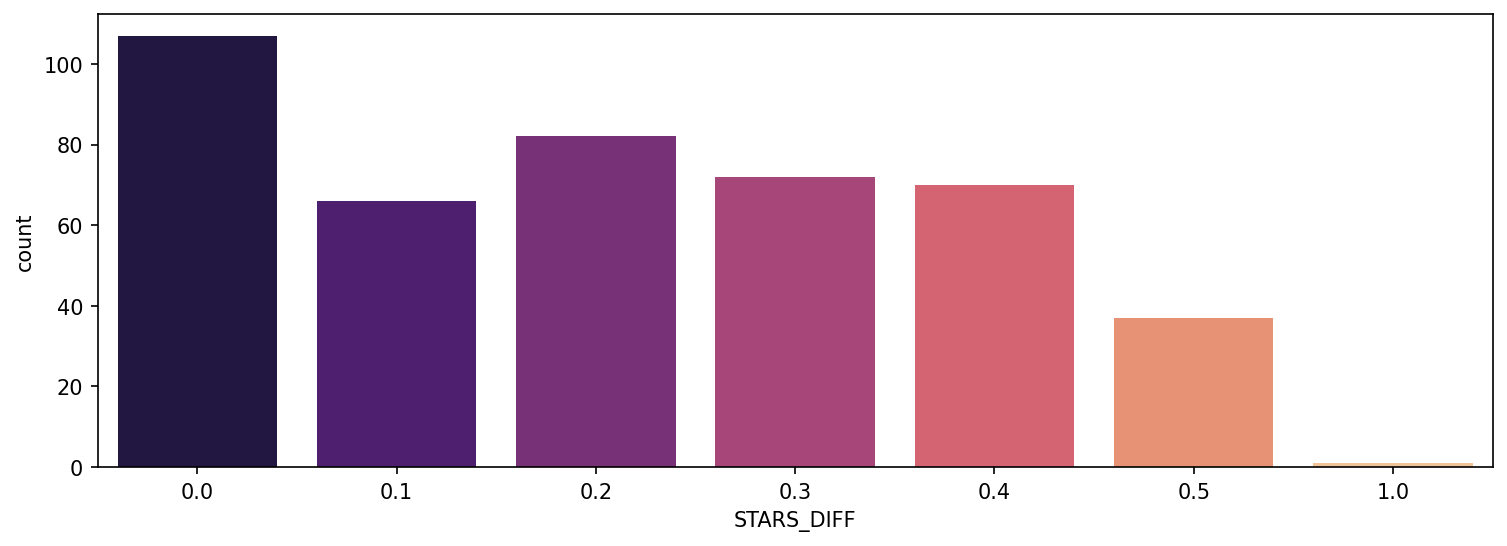

In [22]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='magma')

#### Q: Which movie was 1 star based on previous plot?

In [23]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


### Compare Fandango ratings to other sites

#### Read "all_sites_scores.csv" dataset

In [24]:
all_sites = pd.read_csv("all_sites_scores.csv")

#### Explore data

In [25]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [26]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [27]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


#### Create a scatterplot that investigates the relationship between RT critic reviews and RT user reviews

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

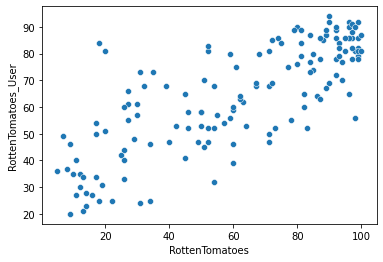

In [28]:
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

(0.0, 100.0)

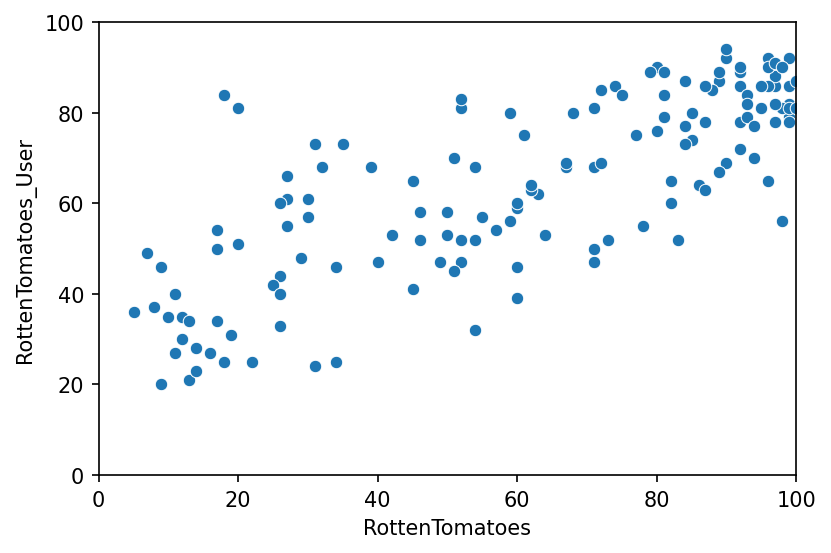

In [29]:
plt.figure(dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

####

In [30]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

#### Calculate the mean absolute difference between RT scores and RT users scores

In [31]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

#### Plot the distribution of the differences between RT critics score and RT user score

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

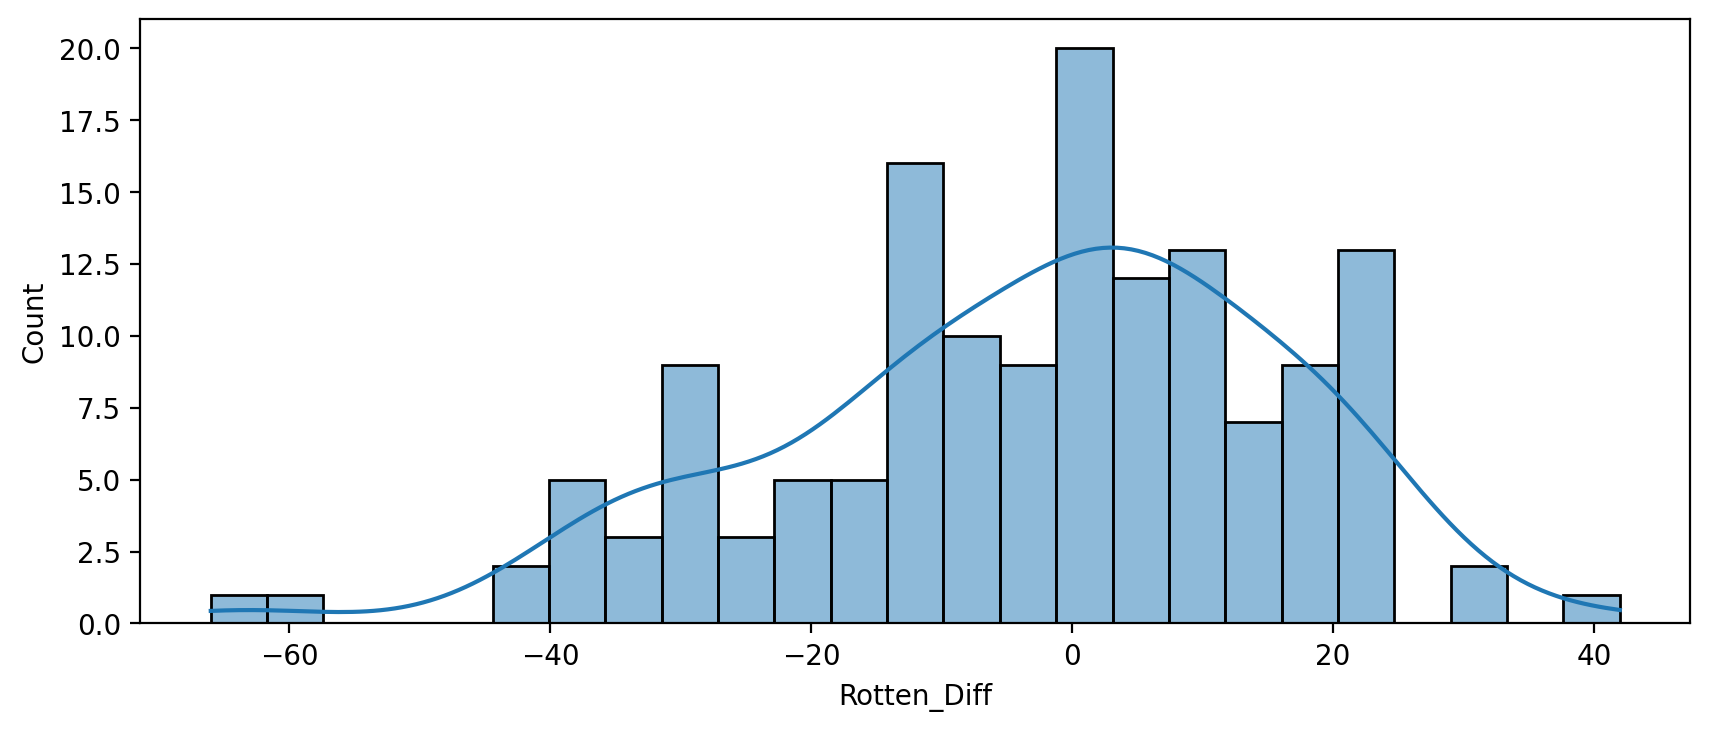

In [32]:

plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

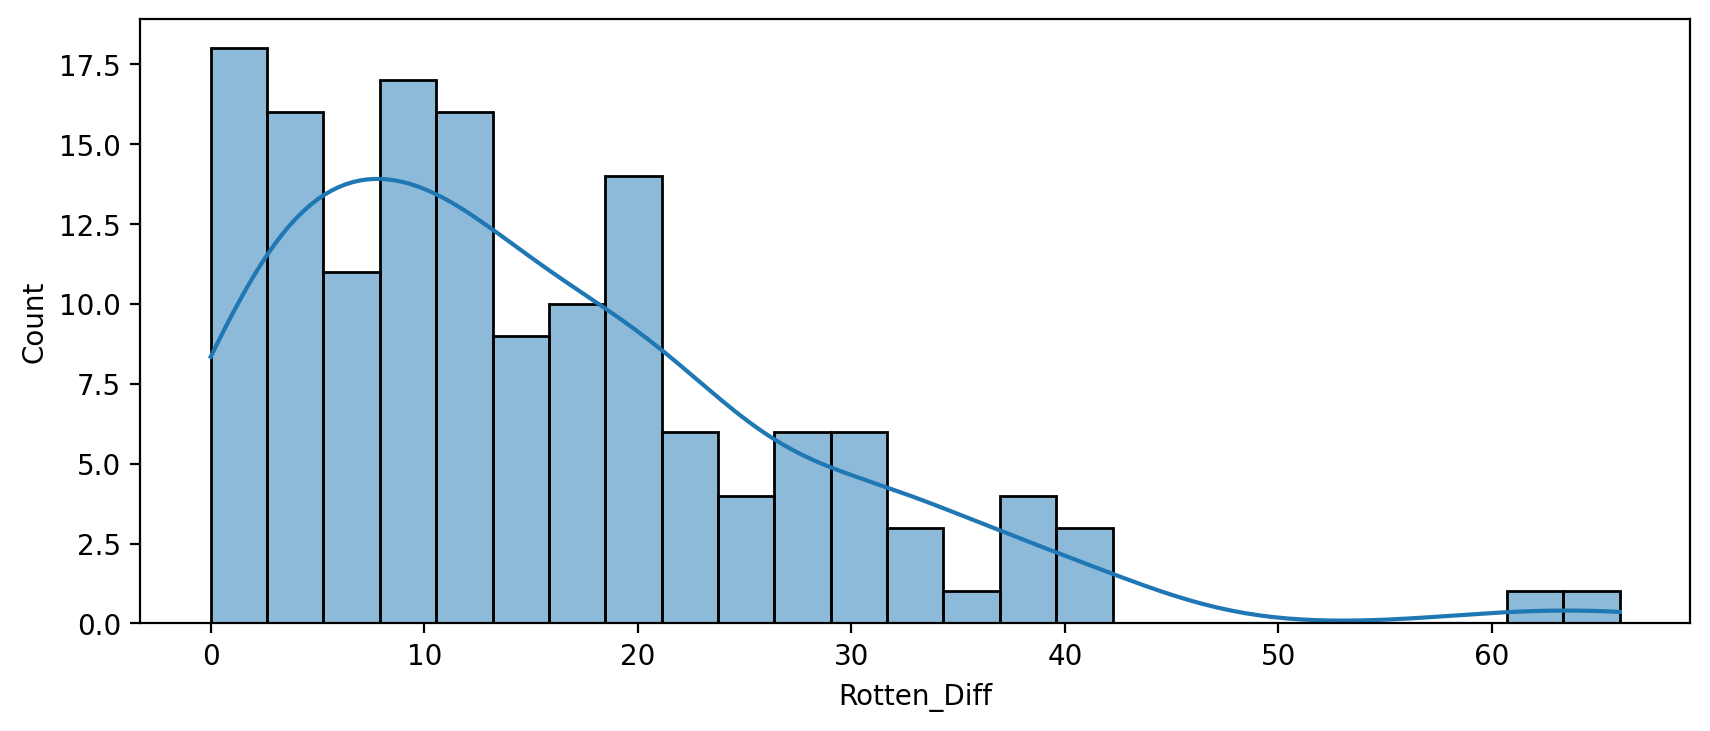

In [33]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),kde=True,bins=25)

#### Q: What are the top 5 and bottom 5 movies users rated higher than critics on avaerage?

In [34]:
all_sites.nsmallest(5,'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


In [35]:
all_sites.nsmallest(5,'Rotten_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [36]:
all_sites.nlargest(5,'Rotten_Diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

#### Display a scatterplot of the Metacritic Rating versus the Metacritic User rating

(0.0, 100.0)

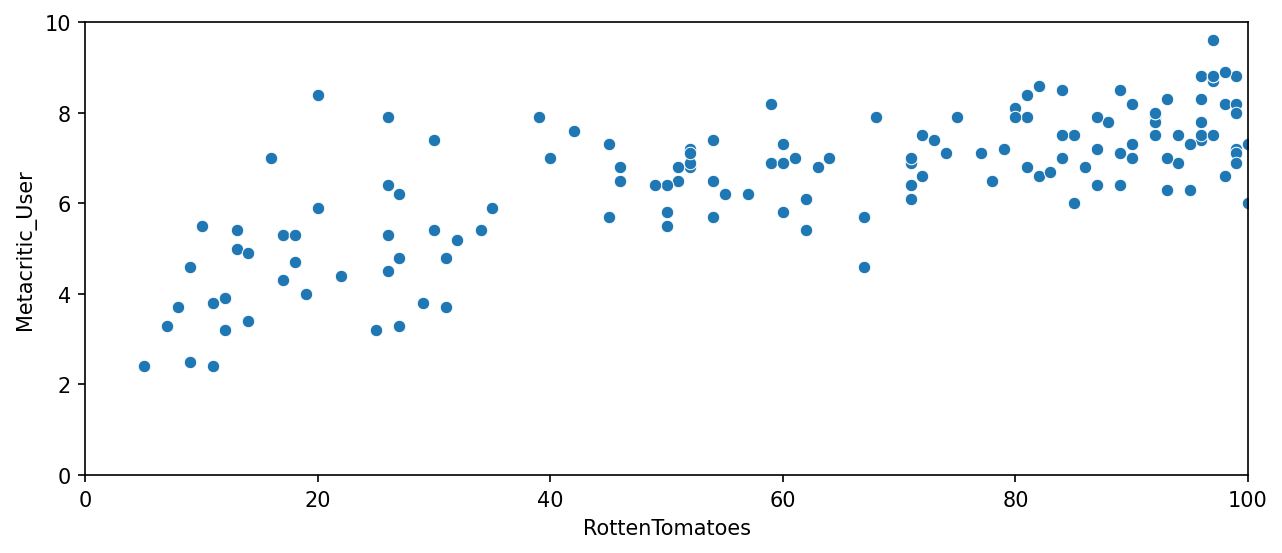

In [37]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

#### Create a scatterplot that investigate the relationship between vote counts on MetaCritic versus vote counts on IMDB

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

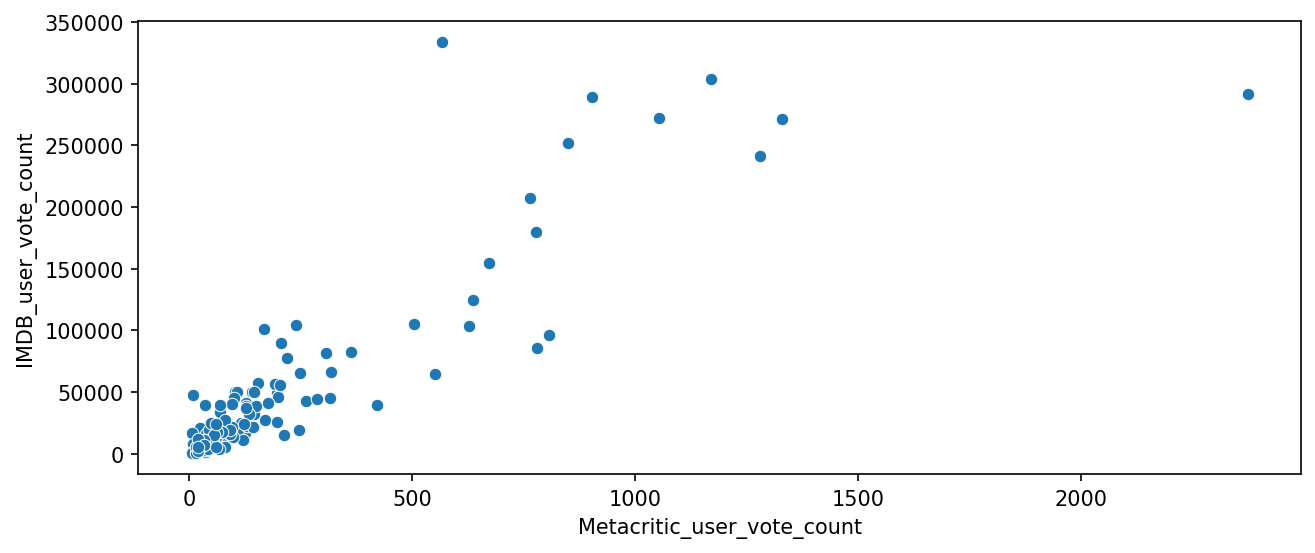

In [38]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

#### Q: What movie has the highest count?

In [39]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


#### Q: What movie has the highest Metacritic user vote count?

In [40]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

#### Combine the Fandango Table with the All Sites table. 

In [41]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [42]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


#### Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango.

In [43]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [44]:
import numpy as np
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20,1)

In [45]:
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [46]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [47]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


#### Create a norm_scores DataFrame that only contains the normalizes ratings.

In [48]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [49]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites

#### Create a plot comparing the distributions of normalized ratings across all sites.

<AxesSubplot:ylabel='Density'>

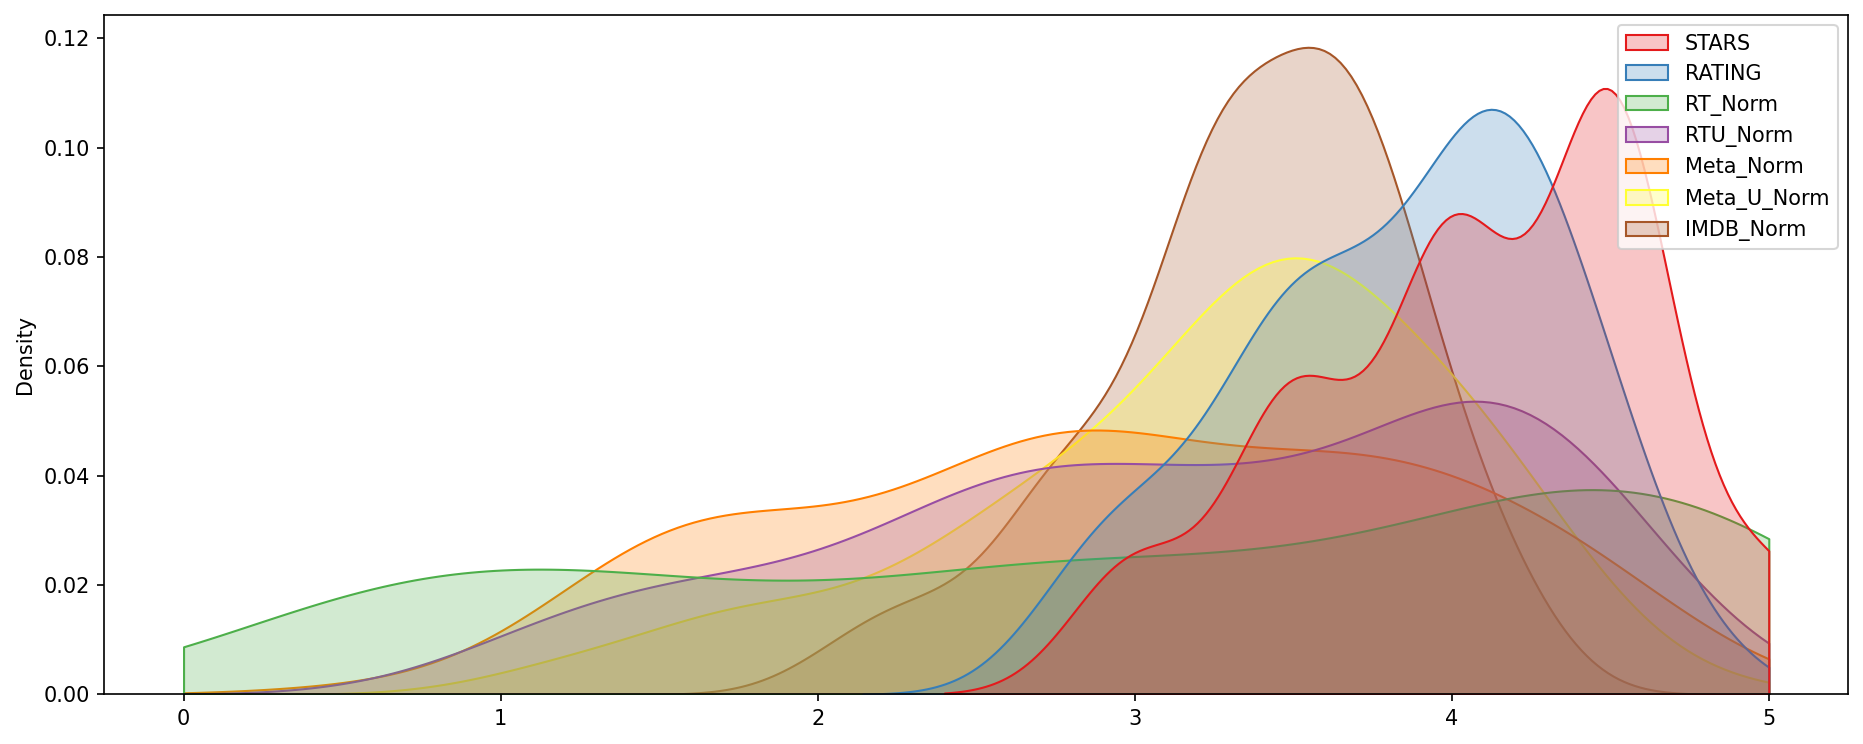

In [50]:
plt.figure(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1')

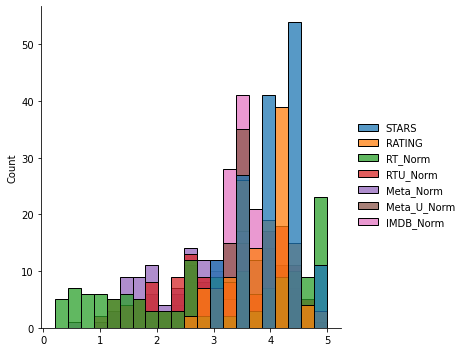

In [51]:
sns.displot(data=norm_scores)

<AxesSubplot:ylabel='Density'>

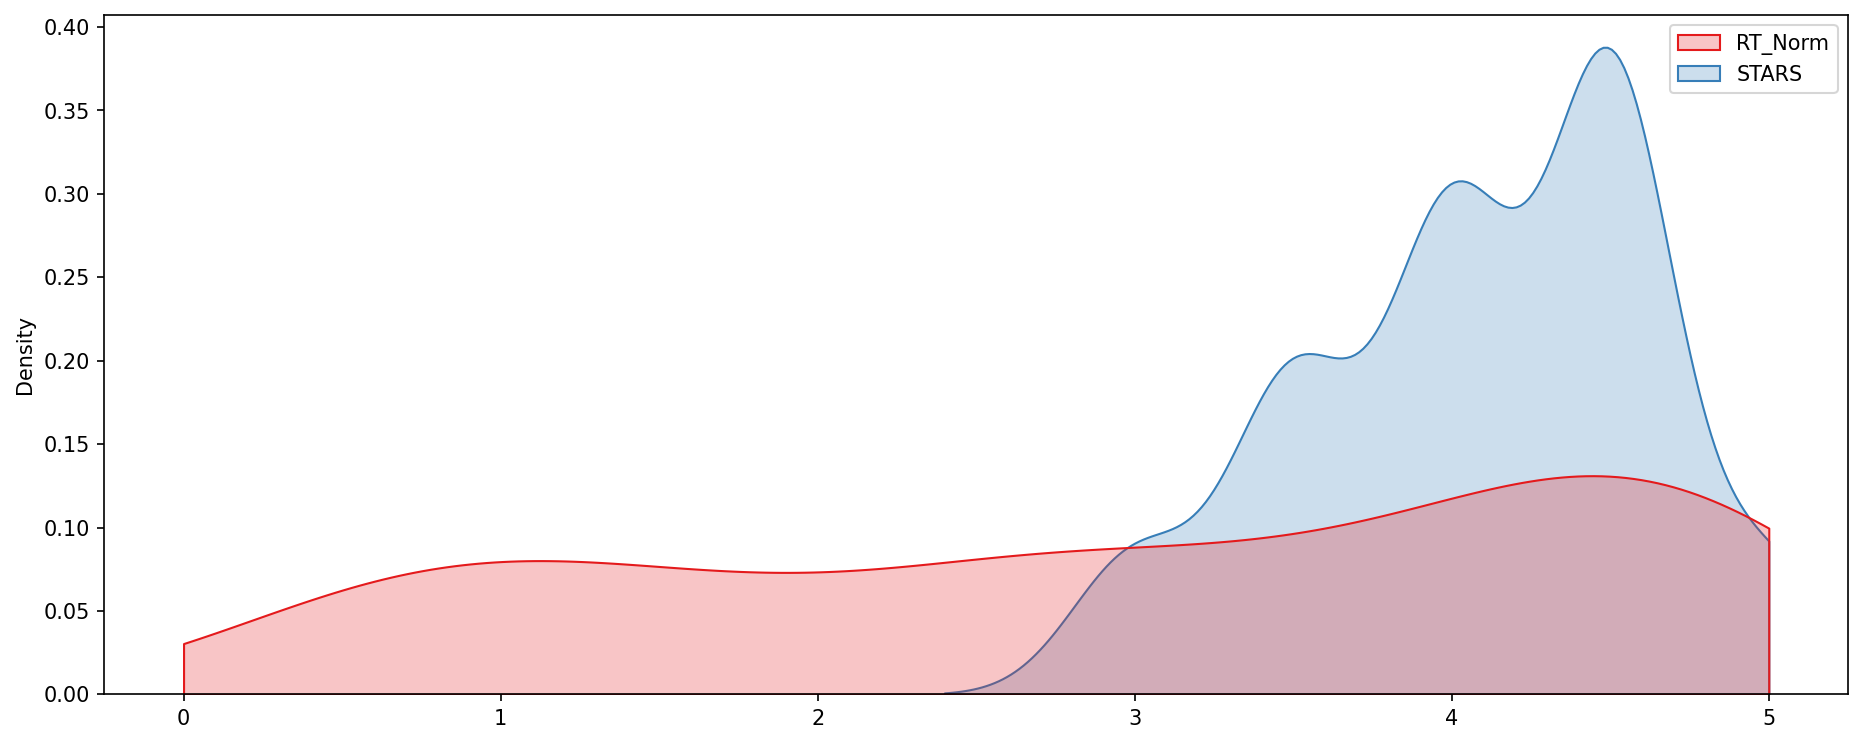

In [52]:
plt.figure(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1')


#### Create a histplot comparing all normalised scores.

<AxesSubplot:ylabel='Count'>

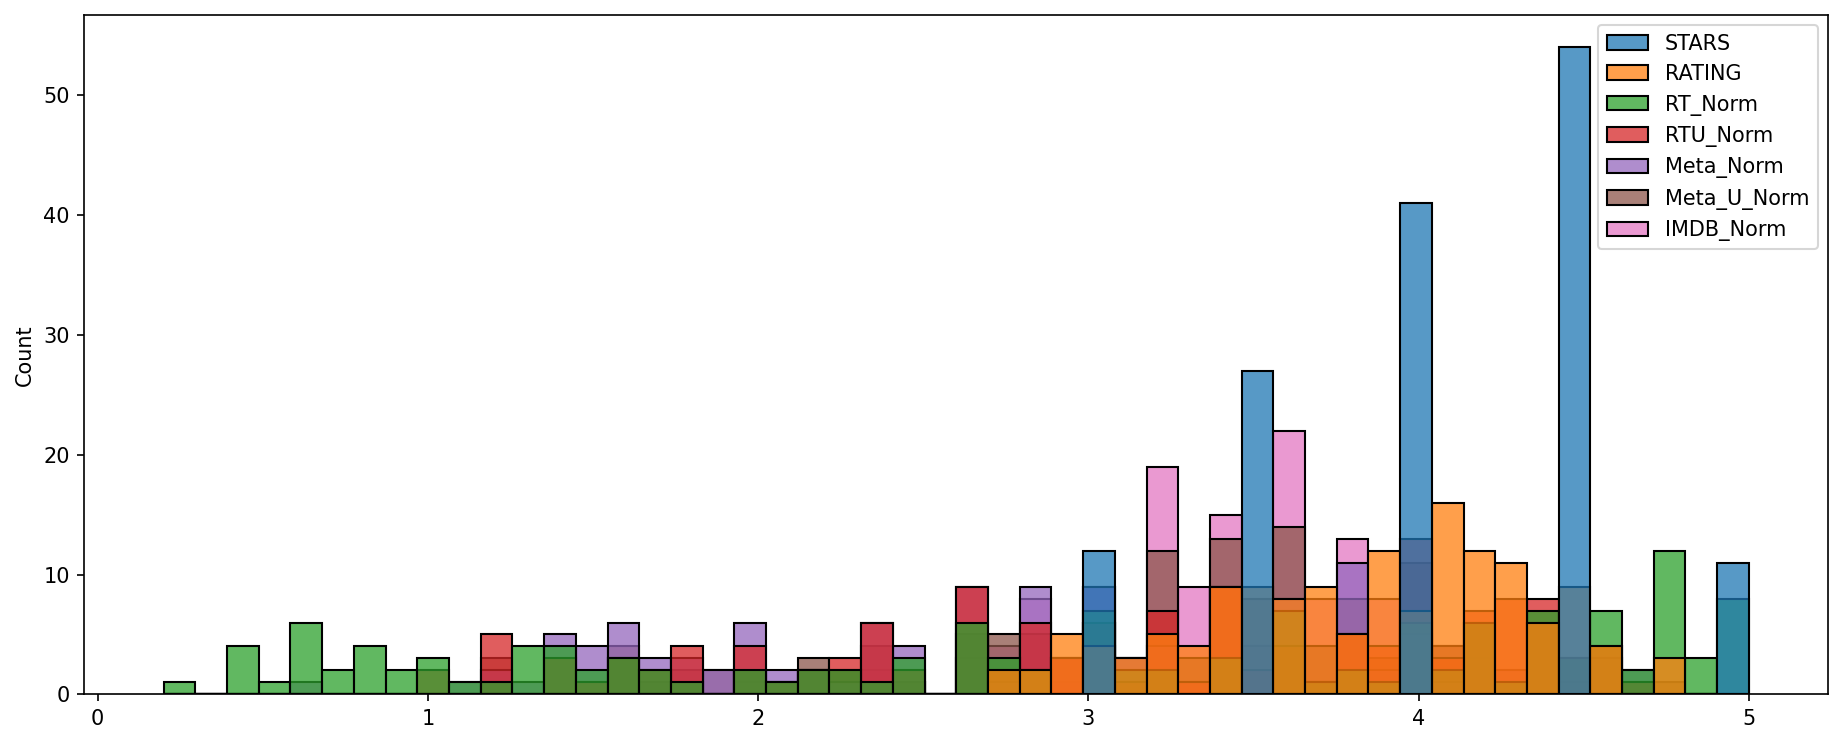

In [53]:
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(norm_scores,bins=50)

### How are the worst movie rated across all platforms?

#### Create a clustermap visualization of all normalized scores.

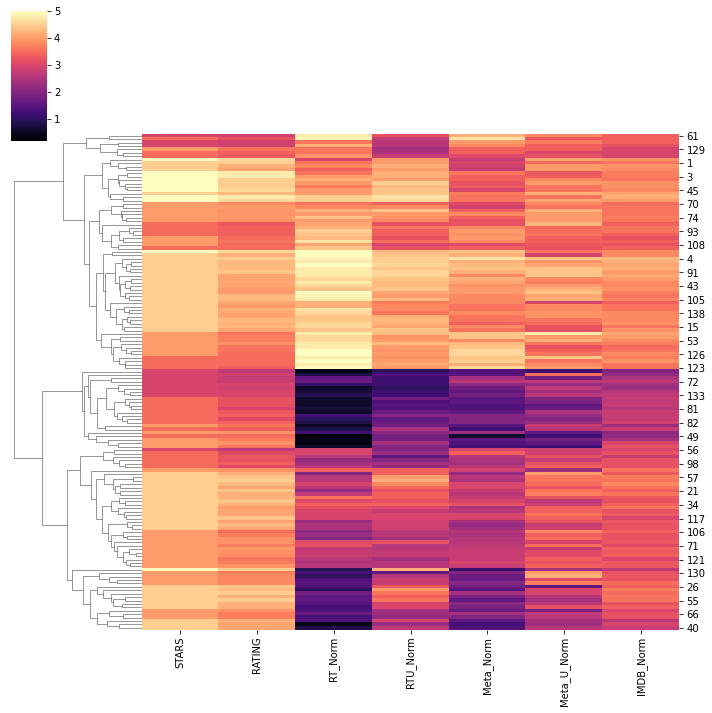

In [54]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

####  Q: What are the top 10 lowest rated movies based off the Rotten Tomatoes Critic Ratings ? What are the normalized scores across all platforms for these movies?

In [55]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [56]:
worst_films = norm_films.nsmallest(10,'RT_Norm')

In [57]:
worst_films

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


#### Visualize the distribution of ratings across all sites for the top 10 worst movies.

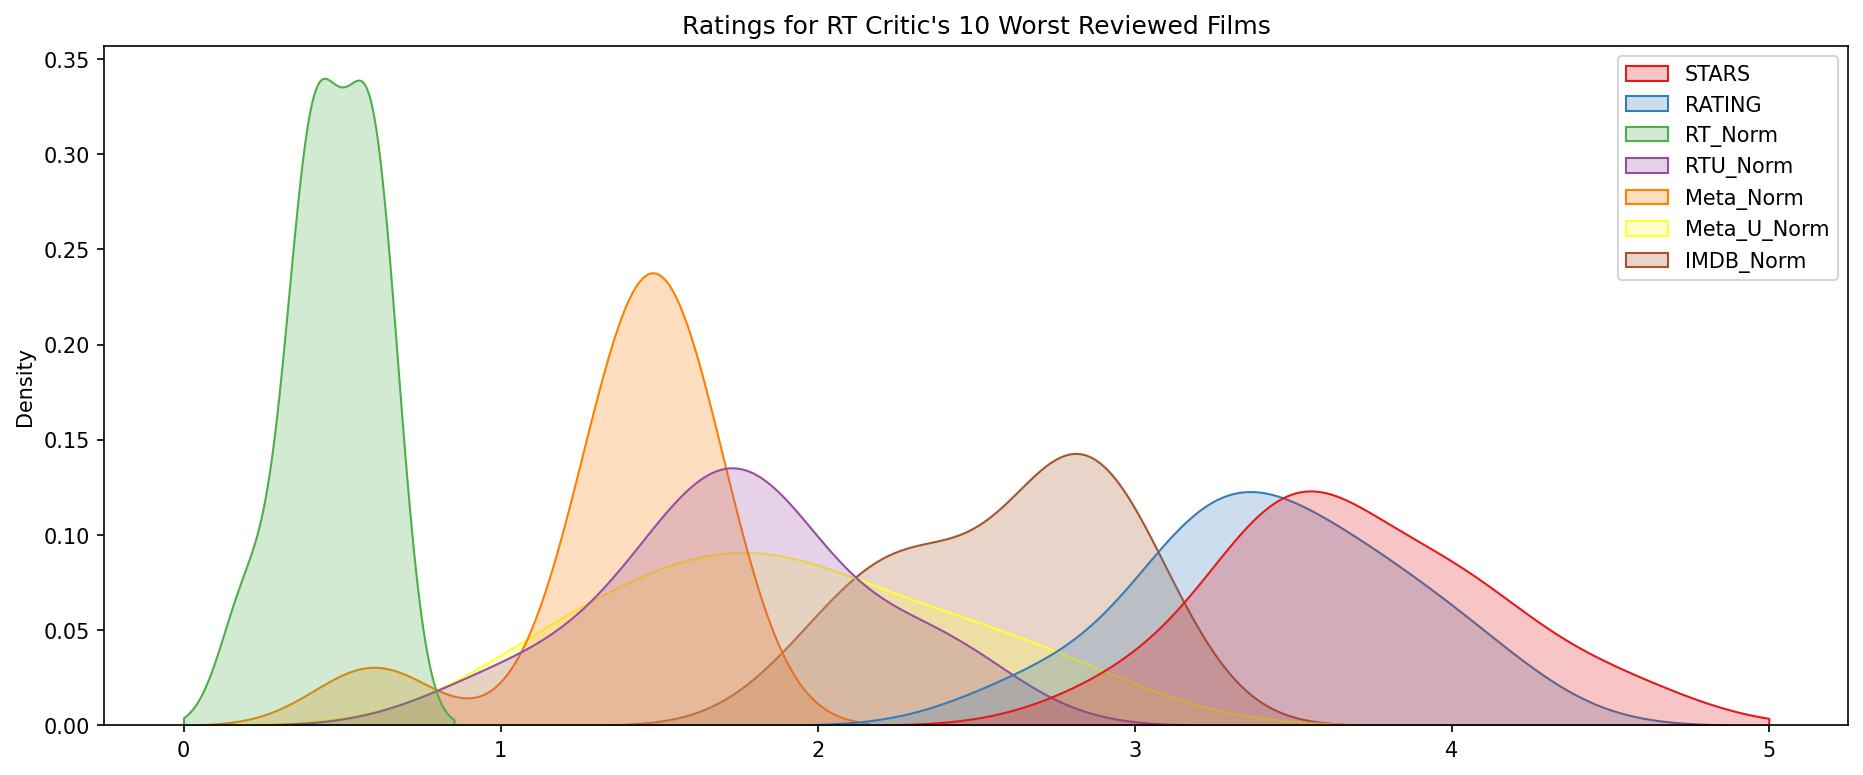

In [58]:
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

In [59]:
norm_films.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                   3
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [60]:
0.4+2.3+1.3+2.3+3

9.3

In [61]:
9.3/5

1.86

### Summary: Fandango is showing around 3-4 star ratings for films that are clearly bad! However, biggest offender is taken 3!. Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms!----reference by Pierian Data Inc.